# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<div class="alert alert-block alert-warning">  Технологический процесс:
Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate **— ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота
Параметры этапов
air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи

<div class="alert alert-block alert-warning">  План работы есть в документации к заданию на вкладке Технологический процесс (выше выжимка для справки). Для начала ознакомимся с данными, отформатируем и проанализируем. Далее построим модели. 

## Подготовка данных

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-warning">  Открываем данные и знакомимся с ними - таблицы, шэйпы, дупликат, пропуски, выбросы в данных. 

In [23]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv(r"C:\Users\QWE\Documents\Проекты для GitHub\9\gold_industry_train.csv")
    df_test = pd.read_csv(r"C:\Users\QWE\Documents\Проекты для GitHub\9\gold_industry_test.csv")
    df_full = pd.read_csv(r"C:\Users\QWE\Documents\Проекты для GitHub\9\gold_industry_full.csv")


In [24]:
for df in df_train, df_test, df_full:
    print(df.shape)

(14579, 87)
(4860, 53)
(19439, 87)


In [25]:
df_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [26]:
df_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [27]:
df_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [30]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


<div class="alert alert-block alert-warning">  Проверяем на дубликаты

In [31]:
df_test.duplicated().sum()

0

In [32]:
df_train.duplicated().sum()

0

In [33]:
df_full.duplicated().sum()

0

<div class="alert alert-block alert-warning">  Дупликатов нет

In [34]:
df_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [35]:
df_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [36]:
df_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [37]:
def not_empty_columns(df):
    not_empty_columns = []
    for column in df.columns:
        if df[column].isna().sum() == 0:
            not_empty_columns.append(column)
    print(not_empty_columns)
    return not_empty_columns
not_empty_columns(df_train)

['date', 'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.recovery', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'primary_cleaner.input.feed_size', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.output.concentrate_au', 'primary_c

['date',
 'rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_level',
 'primary_cleaner.output

In [38]:
def isna_df(df):
    for column in df.columns:
        print('Количество пропусков:', df.isna().sum())
isna_df(df_test)

Количество пропусков: date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_

In [39]:
isna_df(df_train)

Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.t

Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.t

Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
Количество пропусков: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.t

In [40]:
isna_df(df_full)

Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.t

Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.t

Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
Количество пропусков: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.t

<div class="alert alert-block alert-warning">  Проверка, что эффективность обогащения рассчитана правильно.

In [41]:
df_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au',
                        'rougher.output.recovery'], inplace=True)

<div class="alert alert-block alert-warning">  Удаляем пропуски NaN в столбцах.

In [42]:
concentrate_au = df_train['rougher.output.concentrate_au']
tail_au  = df_train['rougher.output.tail_au']
feed_au = df_train['rougher.input.feed_au']
df_recovery = df_train['rougher.output.recovery']
calculated_recovery = (concentrate_au * (feed_au - tail_au) / feed_au / 
                       (concentrate_au - tail_au) * 100)
print('Эффективность обогащения чернового концентрата', calculated_recovery)
print('Средняя абсолютная ошибка =', mean_absolute_error(df_recovery, calculated_recovery))

Эффективность обогащения чернового концентрата 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64
Средняя абсолютная ошибка = 1.0851689485498649e-14


<div class="alert alert-block alert-warning">  Аболютная ошибка MAE оч маленькая, можно считать что расчетное значение совпадает их данных.

In [43]:
df_train = df_train.dropna()
df_test = df_test.dropna()

<div class="alert alert-block alert-warning">  Смотрим количество пропусков в данных

In [44]:
df_train.isna().mean()

date                      0.0
rougher.input.feed_au     0.0
rougher.input.feed_ag     0.0
rougher.input.feed_pb     0.0
rougher.input.feed_sol    0.0
                         ... 
final.output.recovery     0.0
final.output.tail_au      0.0
final.output.tail_ag      0.0
final.output.tail_pb      0.0
final.output.tail_sol     0.0
Length: 87, dtype: float64

In [45]:
df_test.isna().mean()

date                                          0.0
rougher.input.feed_au                         0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0
rougher.state.floatbank10_a_air               0.0
rougher.state.floatbank10_a_level             0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_b_level             0.0
rougher.state.floatbank10_c_air               0.0
rougher.state.floatbank10_c_level             0.0
rougher.state.floatbank10_d_air               0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0


<div class="alert alert-block alert-warning">  Проверяем еще раз данные

In [46]:
df_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


<div class="alert alert-block alert-warning">  Смотрим отличия данных по колонкам. В задании известно что данные отличаются, и некоторые данные получаются в процессе

In [47]:
df_train.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate

In [48]:
df_test.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'prim

<div class="alert alert-block alert-warning">  Как я написал выше, некоторые параметры замеряются позже по описанному в задании тех процессу, поэтому некоторые признаки различаются в данных. Выберем столбцы по которым будет обучатся модель. 

<div class="alert alert-block alert-warning">  Выделим столбцы кроме date, для работы этот столбец лишний. Несет в себе только дату и время измерения. 

<div class="alert alert-block alert-warning">  Для прогнозирвоания по заданию rougher.output.recovery, возьмем данные из  стоблцов rougher

In [49]:
features_columns = df_test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns= set(features_columns)
print(rougher_features_columns)

{'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_d_air', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'rougher.state.floatbank10_c_air', 'primary_cleaner.state.floatbank8_b_air', 'rougher.state.floatbank10_e_air', 'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.sulfate', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_c_level', 'primary_cleaner.state.floatbank8_c_air', 'rougher.state.floatbank10_e_level', 'rougher.input.floatbank11_sulfate'}


In [50]:
print(final_features_columns)

{'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_d_air', 'secondary_cleaner.state.floatbank2_b_level', 'rougher.input.feed_sol', 'primary_cleaner.input.xanthate', 'secondary_cleaner.state.floatbank6_a_level', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank5_a_air', 'rougher.state.floatbank10_a_level', 'secondary_cleaner.state.floatbank2_a_level', 'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'rougher.state.floatbank10_b_air', 'rougher.input.feed_au', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_a_air', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank4_

<div class="alert alert-block alert-warning"> Далее посмотрим распределение данных в гистограммах.

# 1 Анализ данных

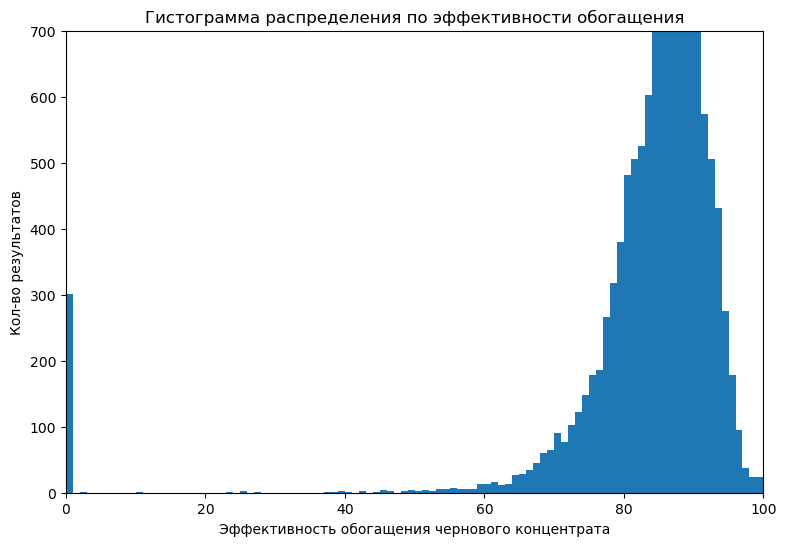

In [51]:
plt.figure(figsize=[9,6])
plt.hist(df_train['rougher.output.recovery'], bins=100) 
plt.xlim([0, 100])
plt.ylim([0, 700])
plt.title('Гистограмма распределения по эффективности обогащения')
plt.xlabel('Эффективность обогащения чернового концентрата')
plt.ylabel('Кол-во результатов')
plt.show()

<div class="alert alert-block alert-warning"> Околонулевые значения буду убирать из данных для чистоты эксперимента. Таких данных немного

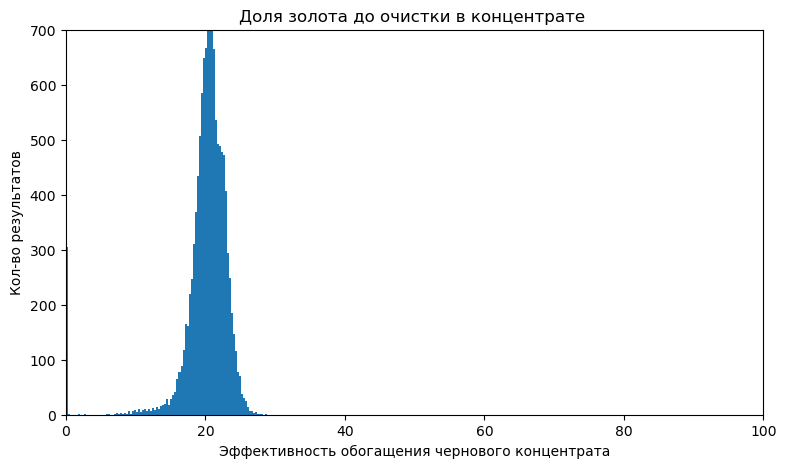

In [52]:
plt.figure(figsize=[9,5])

plt.hist(df_train['rougher.output.concentrate_au'], bins=100)
plt.xlim([0, 100])
plt.ylim([0, 700])

plt.title('Доля золота до очистки в концентрате ')
plt.xlabel('Эффективность обогащения чернового концентрата')
plt.ylabel('Кол-во результатов')

plt.show()

In [53]:
df_train[df_train['rougher.output.recovery'] < 1].head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,...,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,...,9.734058,46.250638,4.577832,10.691605,5.274175,70.675633,2.540843,10.728531,1.641216,18.349339
41,2016-01-16 17:00:00,7.039270,7.835670,2.770323,38.010139,565.344417,45.331628,12.785794,7.797513,1000.758702,...,8.737024,45.267942,5.759800,9.537415,3.997737,68.638723,2.471388,10.623064,1.217058,16.072705


In [54]:
df_train[df_train['rougher.output.concentrate_au'] < 1].head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,...,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,...,9.734058,46.250638,4.577832,10.691605,5.274175,70.675633,2.540843,10.728531,1.641216,18.349339
41,2016-01-16 17:00:00,7.039270,7.835670,2.770323,38.010139,565.344417,45.331628,12.785794,7.797513,1000.758702,...,8.737024,45.267942,5.759800,9.537415,3.997737,68.638723,2.471388,10.623064,1.217058,16.072705


In [55]:
df_train = df_train.drop(df_train[df_train['rougher.output.recovery'] == 0].index)
df_train[df_train['rougher.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


<div class="alert alert-block alert-warning"> На этапе rougher в данныхъ нет информации, можно удалить 

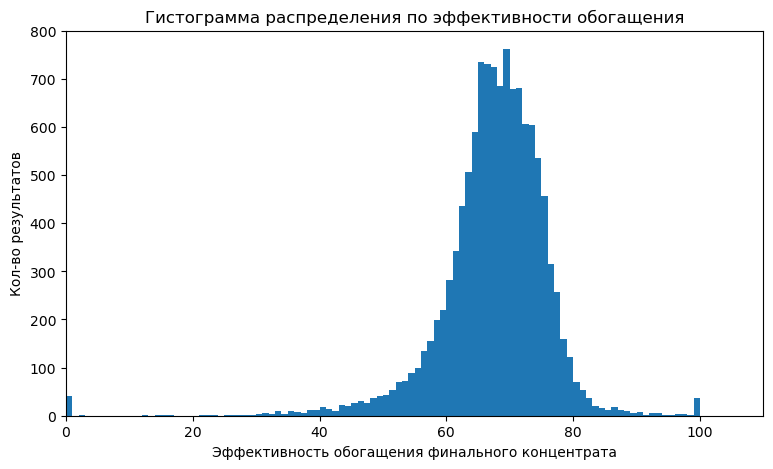

In [56]:
plt.figure(figsize=[9,5])

plt.hist(df_train['final.output.recovery'], bins=100)
plt.xlim([0, 110])
plt.ylim([0, 800])

plt.xlabel('Эффективность обогащения финального концентрата')
plt.ylabel('Кол-во результатов')

plt.title('Гистограмма распределения по эффективности обогащения')
plt.show()

In [57]:
df_train[df_train['final.output.recovery'] < 1].head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
516,2016-02-08 00:00:00,5.598971,7.407737,1.934178,31.762853,500.087438,51.965198,10.251319,6.620908,999.884600,...,10.651508,0.0,0.0,0.0,0.0,0.0,1.779052,8.894029,0.843584,15.417342
943,2016-02-26 17:00:00,7.786147,8.098125,2.588661,34.896012,502.314489,49.985298,8.842907,7.265263,1000.621368,...,11.880836,0.0,0.0,0.0,0.0,0.0,2.984504,10.817313,1.462800,16.407607
944,2016-02-26 18:00:00,7.499248,7.832467,2.435125,34.196525,501.677628,48.845911,8.501246,6.989404,999.826851,...,11.783571,0.0,0.0,0.0,0.0,0.0,2.747294,10.436792,1.207636,17.800392


In [58]:
df_train = df_train.drop(df_train[df_train['final.output.recovery'] == 0].index)
df_train[df_train['final.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11996 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11996 non-null  object 
 1   rougher.input.feed_au                               11996 non-null  float64
 2   rougher.input.feed_ag                               11996 non-null  float64
 3   rougher.input.feed_pb                               11996 non-null  float64
 4   rougher.input.feed_sol                              11996 non-null  float64
 5   rougher.input.feed_rate                             11996 non-null  float64
 6   rougher.input.feed_size                             11996 non-null  float64
 7   rougher.input.floatbank10_sulfate                   11996 non-null  float64
 8   rougher.input.floatbank10_xanthate                  11996 non-null  float64
 9   

<div class="alert alert-block alert-warning"> Удалены околонулевые значения. Удалены пропуски

<div class="alert alert-block alert-warning"> Далее строим гистограммы на металло Au, Ag, Pb на разных этапах очистки и обогащения


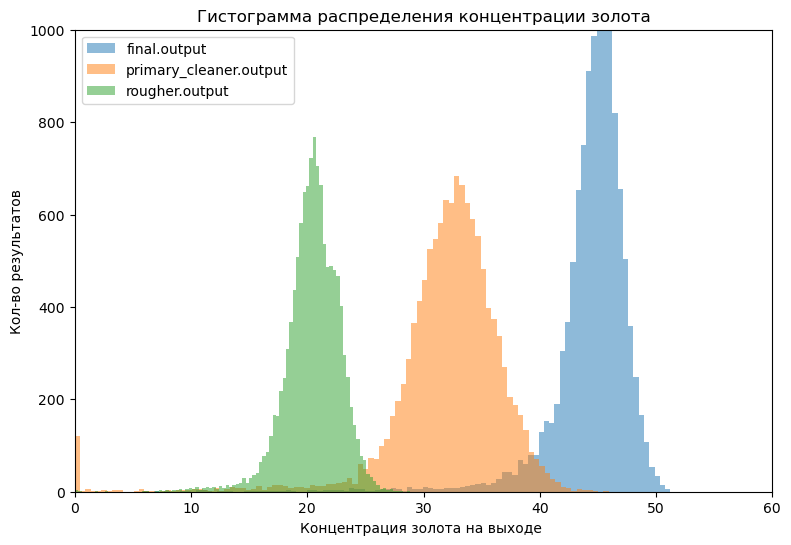

In [60]:
plt.figure(figsize=[9,6])
plt.hist(df_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=0.5)
plt.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=0.5)

plt.xlim([0, 60])
plt.ylim([0, 1000])

plt.xlabel('Концентрация золота на выходе ')
plt.ylabel('Кол-во результатов')
plt.legend(loc='upper left')
plt.title('Гистограмма распределения концентрации золота')
plt.show()

<div class="alert alert-block alert-warning"> Видно что концентрация золота после обработки увеличиывается

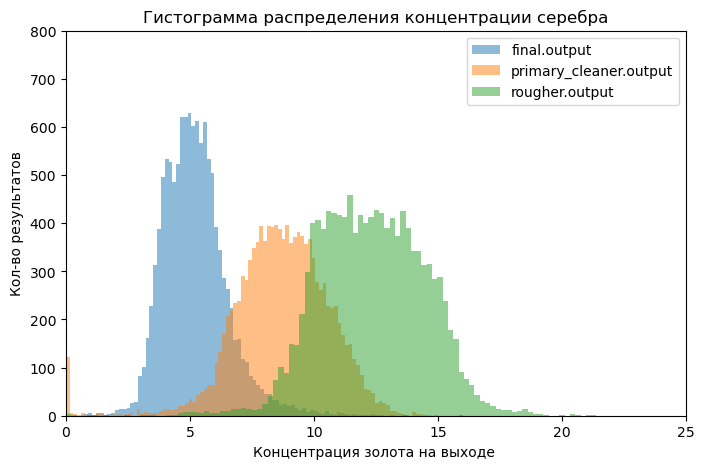

In [61]:
plt.figure(figsize=[8,5])
plt.hist(df_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=0.5)
plt.hist(df_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=0.5)

plt.xlim([0, 25])
plt.ylim([0, 800])

plt.xlabel('Концентрация золота на выходе ')
plt.ylabel('Кол-во результатов')
plt.legend(loc='upper right')
plt.title('Гистограмма распределения концентрации серебра')
plt.show()

<div class="alert alert-block alert-warning"> Видно что концентрация серебра также после обработки ( обогащения) увеличивается

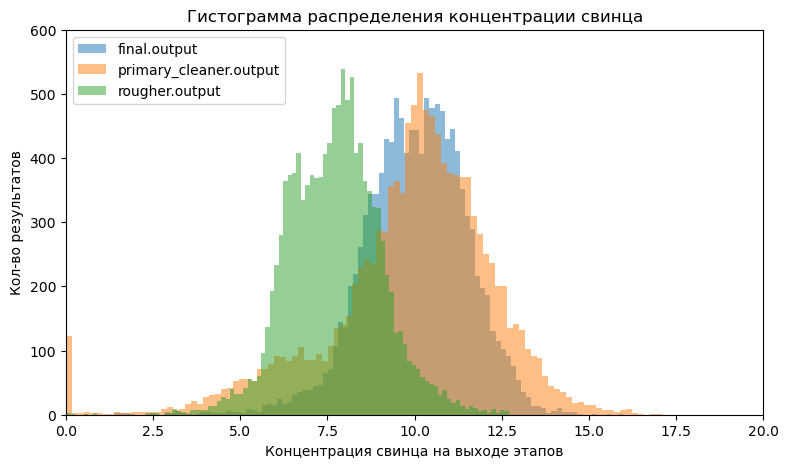

In [62]:
plt.figure(figsize=[9,5])

plt.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=0.5)
plt.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=0.5)
plt.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=0.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel('Концентрация свинца на выходе этапов')
plt.ylabel('Кол-во результатов')

plt.legend(loc='upper left')

plt.title('Гистограмма распределения концентрации свинца')
plt.show()

<div class="alert alert-block alert-warning"> По свинцу тоже - концентрация после обработки увеличивается

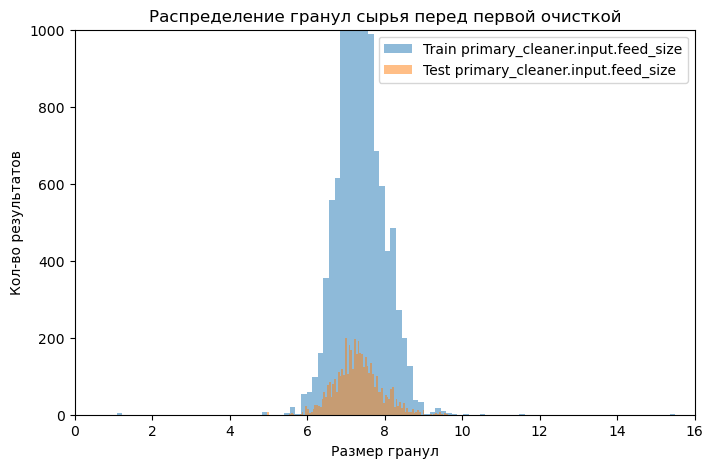

In [63]:
plt.figure(figsize=[8, 5])

plt.hist(df_train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=0.5)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=0.5)

plt.xlim([0, 16])
plt.ylim([0, 1000])

plt.xlabel('Размер гранул')
plt.ylabel('Кол-во результатов')

plt.legend(loc='upper right')

plt.title('Распределение гранул сырья перед первой очисткой')
plt.show()

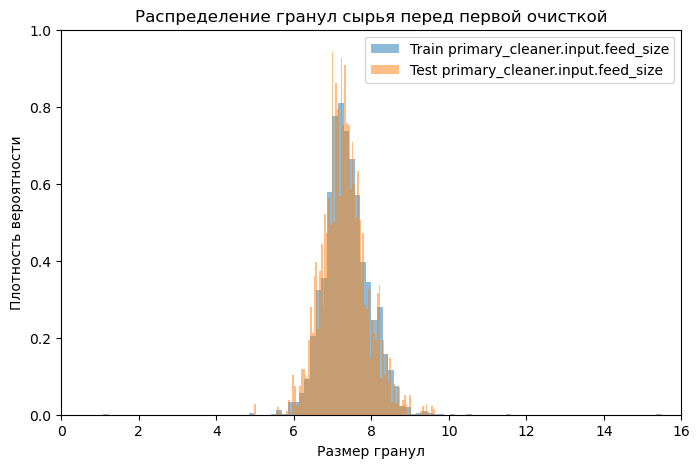

In [64]:
plt.figure(figsize=[8, 5])

plt.hist(df_train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=0.5, density=True)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=0.5, density=True)

plt.xlim([0, 16])
plt.ylim([0, 1])

plt.xlabel('Размер гранул')
plt.ylabel('Плотность вероятности')

plt.legend(loc='upper right')

plt.title('Распределение гранул сырья перед первой очисткой')
plt.show()

<div class="alert alert-block alert-warning">  В3 Добавил! С  density=True, но тут двояко) оставлю оба графика, и в долях и в количестве мне кажется тоже наглядно

In [65]:
final_output_concentrate_train = (df_train['final.output.concentrate_au'] + 
                                  df_train['final.output.concentrate_ag'] +
                                  df_train['final.output.concentrate_pb'] +
                                  df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_train = (df_train['primary_cleaner.output.concentrate_au'] + 
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'] +
                                                df_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_train = (df_train['rougher.output.concentrate_au'] + 
                                    df_train['rougher.output.concentrate_ag'] + 
                                    df_train['rougher.output.concentrate_pb'] +
                                    df_train['rougher.output.concentrate_sol'])

<div class="alert alert-block alert-warning"> В2 Перепписал и добавил новый график!

In [66]:
final_output_concentrate_train = (df_train['final.output.concentrate_au'] + 
                                  df_train['final.output.concentrate_ag'] +
                                  df_train['final.output.concentrate_pb'] +
                                  df_train['final.output.concentrate_sol'])
roupgher_output_concentrate_train = (df_train['rougher.output.concentrate_au'] + 
                                                df_train['rougher.output.concentrate_ag'] + 
                                                df_train['rougher.output.concentrate_pb'] +
                                                df_train['rougher.output.concentrate_sol'])
rougher_input_concentrate_train = (df_train['rougher.input.feed_au'] + 
                                    df_train['rougher.input.feed_ag'] + 
                                    df_train['rougher.input.feed_pb'] +
                                    df_train['rougher.input.feed_sol'])

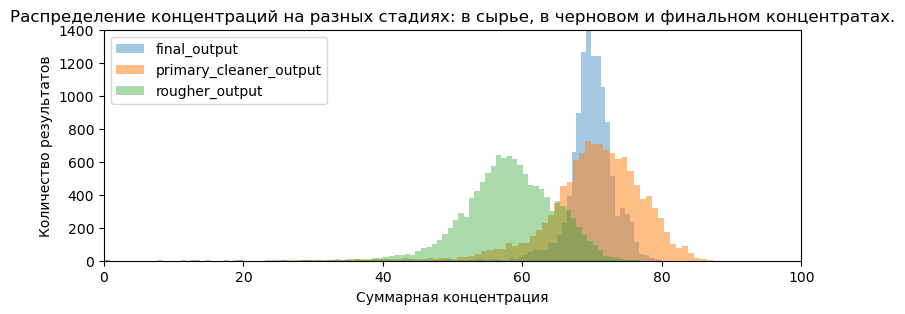

In [67]:
plt.figure(figsize=[9,3])

plt.hist(final_output_concentrate_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(roupgher_output_concentrate_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_input_concentrate_train, bins=100, label = 'rougher_output', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 1400])

plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left')

plt.title('Распределение концентраций на разных стадиях: в сырье, в черновом и финальном концентратах.')
plt.show()

<div class="alert alert-block alert-warning"> В2 На графике видно как меняется концентрация веществ на разных этапах

<div class="alert alert-block alert-warning"> Околонулевые значения - убираю меньшие единицы

In [68]:
df_train[df_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

124

In [69]:
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_au'] == 0].index)

In [70]:
df_train[df_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


<div class="alert alert-block alert-warning"> Изучена концентрация на разных степенях очистки и убраны 

## Модель

In [71]:
def smape(y_true, y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [72]:
def final_smape(smape_rougher, smape_final): 
    return(smape_rougher*0.25 + smape_final*0.75)

In [73]:
columns_to_delete = set(df_train.columns) - final_features_columns
print(columns_to_delete)
train_features_dataset_final = df_train.drop(columns_to_delete, axis=1)
print()
print(train_features_dataset_final.columns)

columns_to_delete = set(train_features_dataset_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_dataset_rougher = train_features_dataset_final.drop(columns_to_delete, axis=1)
print()
print(train_features_dataset_rougher.columns)

{'final.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.tail_au', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.tail_sol', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_pb', 'final.output.concentrate_au', 'rougher.calculation.au_pb_ratio', 'final.output.tail_ag', 'rougher.output.tail_ag', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'final.output.tail_pb', 'final.output.concentrate_ag', 'date', 'final.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.output.recovery', 'final.output.recovery', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.o

In [74]:
train_target_dataset_rougher = df_train['rougher.output.recovery']
train_target_dataset_final = df_train['final.output.recovery']

In [75]:
test_features = df_test.drop('date', axis=1)
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

In [76]:
test_features_rougher.shape

(4537, 22)

In [77]:
custom_score = make_scorer(smape, greater_is_better=False)
model = make_pipeline(StandardScaler(), RandomForestRegressor())
model2 = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [78]:
params_RF = {'randomforestregressor__n_estimators':[5,100],
             'randomforestregressor__max_depth':[1,10]}
params_DT = {'decisiontreeregressor__max_depth':[1,10]}

In [79]:
grid_rougher = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_final = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_rougher_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)
grid_final_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)

In [80]:
grid_rougher.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final.fit(train_features_dataset_final,train_target_dataset_final)
grid_rougher_DT.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final_DT.fit(train_features_dataset_final,train_target_dataset_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 10]},
             scoring=make_scorer(smape, greater_is_better=False))

In [81]:
print('Лучшие модели')
print(grid_rougher.best_estimator_)
print(grid_rougher.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


In [82]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

<div class="alert alert-block alert-warning">  Выбераем лучшу модель:

In [83]:
print('rougher')
print('RandomForest', best_score_rougher, 'DecisionTree', best_score_rougher_DT)
print('final')
print('RandomForest', best_score_final, 'DecisionTree', best_score_final_DT)

rougher
RandomForest -6.2513782703148655 DecisionTree -6.34730732404221
final
RandomForest -8.066747925018982 DecisionTree -8.20290662160794


<div class="alert alert-block alert-warning"> RandomForest показывает лучшие результаты

In [84]:
final_smape(best_score_rougher, best_score_final)

-7.612905511342953

<div class="alert alert-block alert-warning"> Финальный sMAPE:

In [85]:
final_smape(best_score_rougher_DT, best_score_final_DT)

-7.739006797216508

In [86]:
test_frame_for_target = df_test.merge(df_full.loc[:,['date','rougher.output.recovery', 'final.output.recovery']], on = 'date')

In [87]:
target_test_rougher = test_frame_for_target['rougher.output.recovery']
target_test_final = test_frame_for_target['final.output.recovery']

In [88]:
target_test_final, target_test_rougher

(0       70.281454
 1       65.523246
 2       74.817644
 3       63.082720
 4       74.463380
           ...    
 4532    68.786981
 4533    67.839536
 4534    70.847012
 4535    72.659046
 4536    70.279619
 Name: final.output.recovery, Length: 4537, dtype: float64,
 0       89.514960
 1       89.858126
 2       91.816623
 3       88.478959
 4       89.230316
           ...    
 4532    85.462226
 4533    85.443505
 4534    87.235441
 4535    89.299981
 4536    87.650868
 Name: rougher.output.recovery, Length: 4537, dtype: float64)

In [89]:
rogher_test = grid_rougher.predict(test_features_rougher)

In [90]:
final_test = grid_final.predict(test_features_final)

In [91]:
final_smape(smape(target_test_rougher,rogher_test), smape(target_test_final,final_test))

7.3169767818539295

In [92]:
dummy_regressor_rougher = DummyRegressor(strategy='median')
dummy_regressor_rougher.fit(train_features_dataset_rougher, train_target_dataset_rougher)
dummy_rougher_pred = dummy_regressor_rougher.predict(rogher_test)
smape_dummy_rougher = smape(target_test_rougher, dummy_rougher_pred)
print(smape_dummy_rougher) 

5.826671797290862


In [93]:
dummy_regressor_final = DummyRegressor(strategy='median')
dummy_regressor_final.fit(train_features_dataset_final,train_target_dataset_final)
dummy_final_pred = dummy_regressor_final.predict(final_test)
smape_dummy_final = smape(target_test_final, dummy_final_pred) 
print(smape_dummy_final) 

8.952111275992412


In [94]:
final = (smape_dummy_final + smape_dummy_rougher)/2
print(final)

7.389391536641637


<div class="alert alert-block alert-warning"> Модель на RandomForest, ошибка на тестовой выборке 8.7, на константной выборке 8.9

<div class="alert alert-block alert-warning"> В2 Изначально для работы даны несколько больших датасетов. Была проведена их обработка - удаление пропусков, пустых значений. Была проведлена проверка по МАЕ между расчетным и из исходных данных. По анализу данных видно что концентрация веществ растет на каждом этапе. По заданию нужно было спрогнозировать сразу две величины: эффективность обогащения чернового концентрата rougher.output.recovery
и эффективность обогащения финального концентрата final.output.recovery. Данные были разбиты на несколько выборок и построена модель. SMAPE финальной модели на RandomForeste показал - 8.7. 